In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [2]:
# load data from excel file

# Dhafar Hamed Abd; Mohammed Fadhil Mahdi; Arezoo Jahani. (2025). "Rheumatic and autoimmune diseases 
# dataset", https://doi.org/10.7910/DVN/VM4OR3, Harvard Dataverse, V3     

# Mahdi, M. F., Jahani, A., & Abd, D. H. (2025). Diagnosis of rheumatic and autoimmune diseases dataset. Data in 
# Brief, 60, 111623. https://doi.org/10.1016/j.dib.2025.111623

df_raw = pd.read_excel("Rheumatic and Autoimmune Disease Dataset.xlsx")
print(df_raw.columns)
display(df_raw)

Index(['Age', 'Gender', 'ESR', 'CRP', 'RF', 'Anti-CCP', 'HLA-B27', 'ANA',
       'Anti-Ro', 'Anti-La', 'Anti-dsDNA', 'Anti-Sm', 'C3', 'C4', 'Disease'],
      dtype='object')


,Age,Gender,ESR,CRP,RF,Anti-CCP,HLA-B27,ANA,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,C3,C4,Disease
0,70,Male,39.0,18.6,34.2,29.9,Positive,Negative,Positive,Negative,Positive,Positive,NaN,27.0,Rheumatoid Arthritis
1,39,Female,26.0,21.7,35.5,28.9,Negative,NaN,Positive,NaN,Positive,NaN,100.0,66.0,Rheumatoid Arthritis
2,36,Female,41.0,15.6,21.3,21.3,Negative,Negative,NaN,Positive,Negative,NaN,158.0,12.0,Rheumatoid Arthritis
3,35,Male,43.0,23.4,26.0,39.0,NaN,NaN,Positive,Positive,NaN,NaN,119.0,41.0,Rheumatoid Arthritis
4,37,Female,30.0,NaN,38.1,30.8,Positive,Negative,Positive,Negative,Positive,Negative,144.0,49.0,Rheumatoid Arthritis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,32,Male,36.0,17.0,14.5,16.1,Negative,Positive,Negative,Positive,Positive,NaN,NaN,32.0,Psoriatic Arthritis
12081,36,Male,43.0,NaN,17.7,13.5,Negative,Negative,Negative,Positive,NaN,Negative,NaN,41.0,Psoriatic Arthritis
12082,20,Female,31.0,28.8,4.8,5.8,Negative,Positive,Positive,Negative,Negative,Negative,NaN,NaN,Psoriatic Arthritis
12083,33,Female,36.0,NaN,NaN,9.5,Positive,Positive,Positive,Positive,Positive,NaN,96.0,52.0,Psoriatic Arthritis


In [3]:
# pre-process data
# check for missing values by column
print(df_raw.isna().sum())


Age              0
Gender           0
ESR           1088
CRP           2417
RF            1329
Anti-CCP      3263
HLA-B27       1934
ANA           3746
Anti-Ro       2900
Anti-La       3021
Anti-dsDNA    4713
Anti-Sm       5197
C3            1692
C4            2054
Disease          0
dtype: int64


In [4]:
# option 1 - drop all rows with any missing values
df_delete_missing = df_raw.dropna(axis=0, how="any")
display(df_delete_missing)
    # only 452 rows remaining with all data points


,Age,Gender,ESR,CRP,RF,Anti-CCP,HLA-B27,ANA,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,C3,C4,Disease
10,24,Male,31.0,13.7,31.6,27.7,Positive,Negative,Positive,Positive,Negative,Negative,170.0,57.0,Rheumatoid Arthritis
57,35,Male,43.0,25.7,30.5,39.9,Positive,Negative,Positive,Positive,Positive,Positive,114.0,40.0,Rheumatoid Arthritis
74,42,Female,32.0,17.0,39.8,21.3,Positive,Negative,Positive,Negative,Negative,Negative,130.0,29.0,Rheumatoid Arthritis
92,38,Male,30.0,13.2,37.3,33.5,Positive,Negative,Negative,Positive,Positive,Negative,160.0,47.0,Rheumatoid Arthritis
126,48,Female,46.0,11.6,39.8,39.1,Positive,Positive,Positive,Positive,Positive,Positive,169.0,46.0,Rheumatoid Arthritis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,28,Female,35.0,16.2,9.0,17.8,Negative,Negative,Positive,Positive,Positive,Positive,129.0,17.0,Psoriatic Arthritis
11913,31,Male,34.0,21.8,2.9,10.7,Positive,Negative,Negative,Negative,Negative,Negative,100.0,37.0,Psoriatic Arthritis
11932,51,Female,43.0,27.3,0.1,12.5,Negative,Negative,Positive,Positive,Negative,Negative,120.0,55.0,Psoriatic Arthritis
11977,76,Female,41.0,17.1,8.4,8.4,Negative,Negative,Negative,Negative,Positive,Positive,146.0,52.0,Psoriatic Arthritis


In [5]:
# option 2 - impute all missing values with midpoint of normal reference range from the test
    # assumption that the value is normal if doctors did not choose to order the test
    # using reference ranges from Labcorp (see links to URL for each test)

df_normals = pd.DataFrame([
    {"test": "ESR", "min": 0, "max": 40, "normal": 20.0},  # https://www.labcorp.com/tests/005215/sedimentation-rate-modified-westergren
    {"test": "CRP", "min": 0, "max": 10, "normal": 5.0},   # https://www.labcorp.com/tests/006627/c-reactive-protein-crp-quantitative
    {"test": "RF", "min": 0, "max": 14, "normal": 7.0},    # https://www.labcorp.com/tests/006502/rheumatoid-factor-rf
    {"test": "Anti-CCP", "min": 0, "max": 20, "normal": 10.0},  # https://www.labcorp.com/tests/164914/anti-ccp-cyclic-citrullinated-peptide-antibodies-igg-and-iga-elisa
    {"test": "HLA-B27", "min": "Negative", "max": "Negative", "normal": "Negative"},  # https://www.labcorp.com/tests/006924/hla-b-27-disease-association
    {"test": "ANA", "min": "Negative", "max": "Negative", "normal": "Negative"},  # https://www.labcorp.com/tests/164947/ana-by-ifa-reflex-to-titer-and-pattern
    {"test": "Anti-Ro", "min": "Negative", "max": "Negative", "normal": "Negative"},  # https://www.labcorp.com/tests/520010/anti-ro-ss-a-ab-rdl
    {"test": "Anti-La", "min": "Negative", "max": "Negative", "normal": "Negative"},  # https://www.labcorp.com/tests/520320/anti-la-ss-b-ab-rdl
    {"test": "Anti-dsDNA", "min": "Negative", "max": "Negative", "normal": "Negative"}, # https://www.labcorp.com/tests/096339/anti-dsdna-double-stranded-antibodies
    {"test": "Anti-Sm", "min": "Negative", "max": "Negative", "normal": "Negative"},  # https://www.labcorp.com/tests/520013/anti-sm-ab-rdl
    {"test": "C3", "min": 82, "max": 167, "normal": 125.0},  # https://www.labcorp.com/tests/006452/complement-c3
    {"test": "C4", "min": 12, "max": 38, "normal": 25.0}  # https://www.labcorp.com/tests/001834/complement-c4
    ])

print(df_normals)

# impute missing values for each column with df_normals normal value
pd.set_option('future.no_silent_downcasting', True)
df_imputed_normals = pd.DataFrame()
df_imputed_normals["Age"] = df_raw["Age"]
df_imputed_normals["Gender"] = df_raw["Gender"]

num_cols = ["ESR", "CRP", "RF", "Anti-CCP",  "C3", "C4"]
cat_cols = ["HLA-B27", "ANA", "Anti-Ro", "Anti-La", "Anti-dsDNA", "Anti-Sm"]

for col in num_cols:
    test_row = df_normals.loc[df_normals["test"] == col, "normal"]
    val = test_row.iloc[0]
    df_imputed_normals[col] = df_raw[col].astype(float).fillna(val)


for col in cat_cols:
    test_row = df_normals.loc[df_normals["test"] == col, "normal"]
    val = test_row.iloc[0] 
    df_imputed_normals[col] = df_raw[col].astype(object).fillna(val)

df_imputed_normals["Disease"] = df_raw["Disease"]
    
display(df_imputed_normals)

          test       min       max    normal
0          ESR         0        40      20.0
1          CRP         0        10       5.0
2           RF         0        14       7.0
3     Anti-CCP         0        20      10.0
4      HLA-B27  Negative  Negative  Negative
5          ANA  Negative  Negative  Negative
6      Anti-Ro  Negative  Negative  Negative
7      Anti-La  Negative  Negative  Negative
8   Anti-dsDNA  Negative  Negative  Negative
9      Anti-Sm  Negative  Negative  Negative
10          C3        82       167     125.0
11          C4        12        38      25.0


,Age,Gender,ESR,CRP,RF,Anti-CCP,C3,C4,HLA-B27,ANA,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,Disease
0,70,Male,39.0,18.6,34.2,29.9,125.0,27.0,Positive,Negative,Positive,Negative,Positive,Positive,Rheumatoid Arthritis
1,39,Female,26.0,21.7,35.5,28.9,100.0,66.0,Negative,Negative,Positive,Negative,Positive,Negative,Rheumatoid Arthritis
2,36,Female,41.0,15.6,21.3,21.3,158.0,12.0,Negative,Negative,Negative,Positive,Negative,Negative,Rheumatoid Arthritis
3,35,Male,43.0,23.4,26.0,39.0,119.0,41.0,Negative,Negative,Positive,Positive,Negative,Negative,Rheumatoid Arthritis
4,37,Female,30.0,5.0,38.1,30.8,144.0,49.0,Positive,Negative,Positive,Negative,Positive,Negative,Rheumatoid Arthritis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,32,Male,36.0,17.0,14.5,16.1,125.0,32.0,Negative,Positive,Negative,Positive,Positive,Negative,Psoriatic Arthritis
12081,36,Male,43.0,5.0,17.7,13.5,125.0,41.0,Negative,Negative,Negative,Positive,Negative,Negative,Psoriatic Arthritis
12082,20,Female,31.0,28.8,4.8,5.8,125.0,25.0,Negative,Positive,Positive,Negative,Negative,Negative,Psoriatic Arthritis
12083,33,Female,36.0,5.0,7.0,9.5,96.0,52.0,Positive,Positive,Positive,Positive,Positive,Negative,Psoriatic Arthritis


In [6]:
# option 3: impute missing values with mean of those who do / do not have specific disease
    # calculate mean for each numerical test value for those with disease vs those without disease
    # calculate mode (most frequent value) for each categorical test value for those with disease vs those without disease
    # the aggreagate functions excludes missing values when calculating

num_means = df_raw.groupby("Disease")[num_cols].mean()

cat_modes = df_raw.groupby("Disease")[cat_cols].agg(pd.Series.mode)

df_means = pd.concat([num_means, cat_modes], axis=1)

print(df_means)

# impute missing values with appropriate values from df_means
df_imputed_means = df_raw.copy()

for test in df_means.columns:
    df_imputed_means[test] = df_raw[test].fillna(
        df_raw["Disease"].map(df_means[test])
    )

df_imputed_means["Disease"] = df_raw["Disease"]

display(df_imputed_means)

                                    ESR        CRP         RF   Anti-CCP  \
Disease                                                                    
Ankylosing Spondylitis        32.348140  21.583884  19.997699  19.702078   
Normal                         8.125860   1.573401  10.196017   9.759237   
Psoriatic Arthritis           40.165325  22.998198   9.951151   9.928812   
Reactive Arthritis            24.921277  15.454745  20.078161  19.922626   
Rheumatoid Arthritis          35.087409  20.619524  30.369862  30.575257   
Sjögren's Syndrome             8.194920   1.512170  20.052699  20.145808   
Systemic Lupus Erythematosus   8.334416   1.546330  19.878607  20.233728   

                                      C3         C4   HLA-B27       ANA  \
Disease                                                                   
Ankylosing Spondylitis        140.879757  42.777591  Positive  Negative   
Normal                        140.281546  42.020942  Positive  Positive   
Psoriatic Arthr

,Age,Gender,ESR,CRP,RF,Anti-CCP,HLA-B27,ANA,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,C3,C4,Disease
0,70,Male,39.0,18.600000,34.200000,29.9,Positive,Negative,Positive,Negative,Positive,Positive,141.927265,27.000000,Rheumatoid Arthritis
1,39,Female,26.0,21.700000,35.500000,28.9,Negative,Positive,Positive,Positive,Positive,Negative,100.000000,66.000000,Rheumatoid Arthritis
2,36,Female,41.0,15.600000,21.300000,21.3,Negative,Negative,Negative,Positive,Negative,Negative,158.000000,12.000000,Rheumatoid Arthritis
3,35,Male,43.0,23.400000,26.000000,39.0,Negative,Positive,Positive,Positive,Negative,Negative,119.000000,41.000000,Rheumatoid Arthritis
4,37,Female,30.0,20.619524,38.100000,30.8,Positive,Negative,Positive,Negative,Positive,Negative,144.000000,49.000000,Rheumatoid Arthritis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,32,Male,36.0,17.000000,14.500000,16.1,Negative,Positive,Negative,Positive,Positive,Positive,134.223082,32.000000,Psoriatic Arthritis
12081,36,Male,43.0,22.998198,17.700000,13.5,Negative,Negative,Negative,Positive,Negative,Negative,134.223082,41.000000,Psoriatic Arthritis
12082,20,Female,31.0,28.800000,4.800000,5.8,Negative,Positive,Positive,Negative,Negative,Negative,134.223082,41.419529,Psoriatic Arthritis
12083,33,Female,36.0,22.998198,9.951151,9.5,Positive,Positive,Positive,Positive,Positive,Positive,96.000000,52.000000,Psoriatic Arthritis


In [7]:
# option 4: Use SimpleImputer to impute mean/most frequent values and add indicator flag for missingness

df_simple_imputer = df_raw.copy()

num_transformer = SimpleImputer(missing_values=np.nan, strategy="median", add_indicator=True)
num_imputed = num_transformer.fit_transform(df_simple_imputer[num_cols])
num_out_cols = num_cols + [f"{col}_missing" for col in num_cols]
df_num = pd.DataFrame(num_imputed, columns=num_out_cols, index=df_simple_imputer.index)

cat_transformer = SimpleImputer(strategy="most_frequent", add_indicator=True)
cat_imputed = cat_transformer.fit_transform(df_simple_imputer[cat_cols])
cat_out_cols = cat_cols + [f"{col}_missing" for col in cat_cols]
df_cat = pd.DataFrame(cat_imputed, columns=cat_out_cols, index=df_simple_imputer.index)

df_simple_imputer = df_simple_imputer.drop(columns=num_cols + cat_cols)
df_simple_imputer = pd.concat([df_simple_imputer, df_num, df_cat], axis=1)

display(df_simple_imputer)

,Age,Gender,Disease,ESR,CRP,RF,Anti-CCP,C3,C4,ESR_missing,...,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,HLA-B27_missing,ANA_missing,Anti-Ro_missing,Anti-La_missing,Anti-dsDNA_missing,Anti-Sm_missing
0,70,Male,Rheumatoid Arthritis,39.0,18.6,34.2,29.9,133.0,27.0,0.0,...,Positive,Negative,Positive,Positive,False,False,False,False,False,False
1,39,Female,Rheumatoid Arthritis,26.0,21.7,35.5,28.9,100.0,66.0,0.0,...,Positive,Positive,Positive,Positive,False,True,False,True,False,True
2,36,Female,Rheumatoid Arthritis,41.0,15.6,21.3,21.3,158.0,12.0,0.0,...,Positive,Positive,Negative,Positive,False,False,True,False,False,True
3,35,Male,Rheumatoid Arthritis,43.0,23.4,26.0,39.0,119.0,41.0,0.0,...,Positive,Positive,Positive,Positive,True,True,False,False,True,True
4,37,Female,Rheumatoid Arthritis,30.0,15.6,38.1,30.8,144.0,49.0,0.0,...,Positive,Negative,Positive,Negative,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,32,Male,Psoriatic Arthritis,36.0,17.0,14.5,16.1,133.0,32.0,0.0,...,Negative,Positive,Positive,Positive,False,False,False,False,False,True
12081,36,Male,Psoriatic Arthritis,43.0,15.6,17.7,13.5,133.0,41.0,0.0,...,Negative,Positive,Positive,Negative,False,False,False,False,True,False
12082,20,Female,Psoriatic Arthritis,31.0,28.8,4.8,5.8,133.0,38.0,0.0,...,Positive,Negative,Negative,Negative,False,False,False,False,False,False
12083,33,Female,Psoriatic Arthritis,36.0,15.6,19.2,9.5,96.0,52.0,0.0,...,Positive,Positive,Positive,Positive,False,False,False,False,False,True


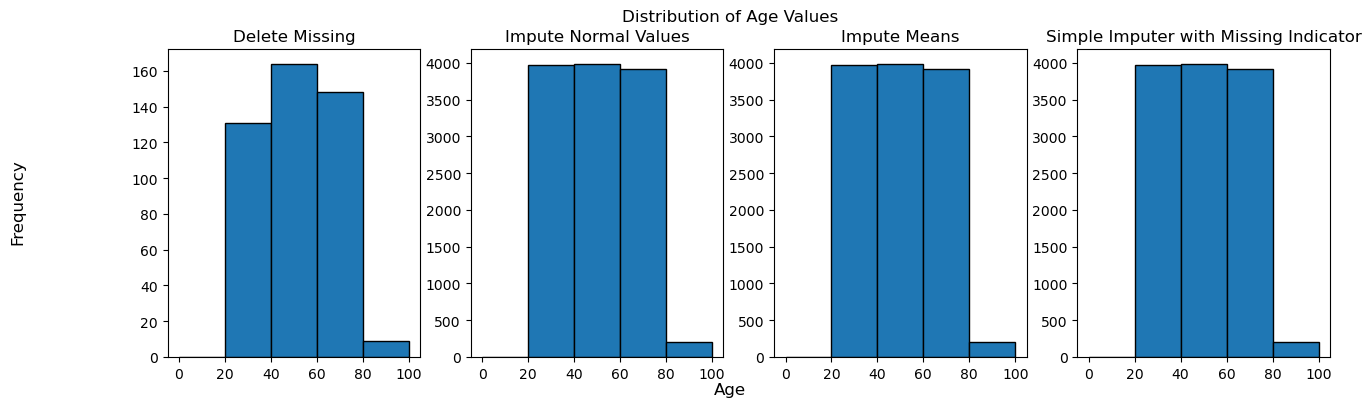

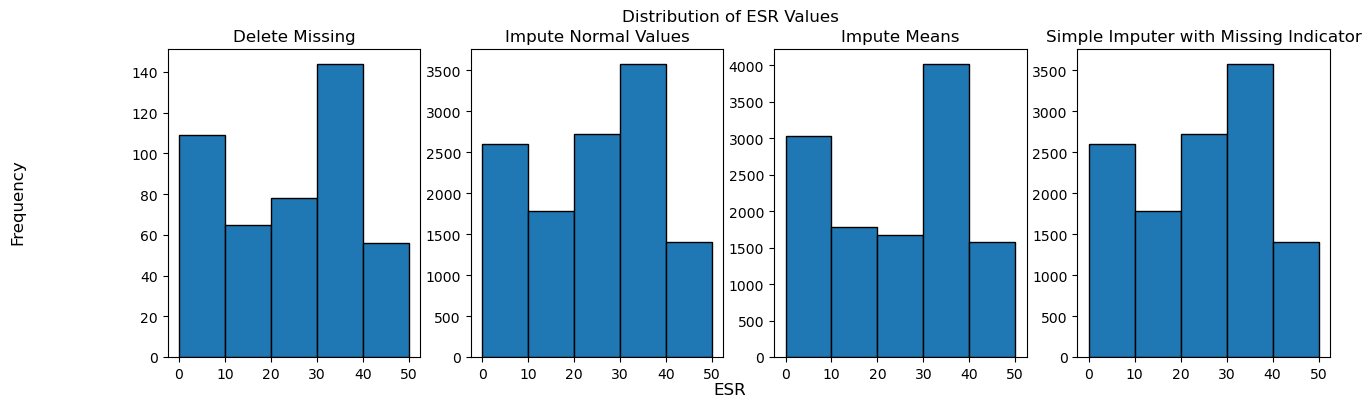

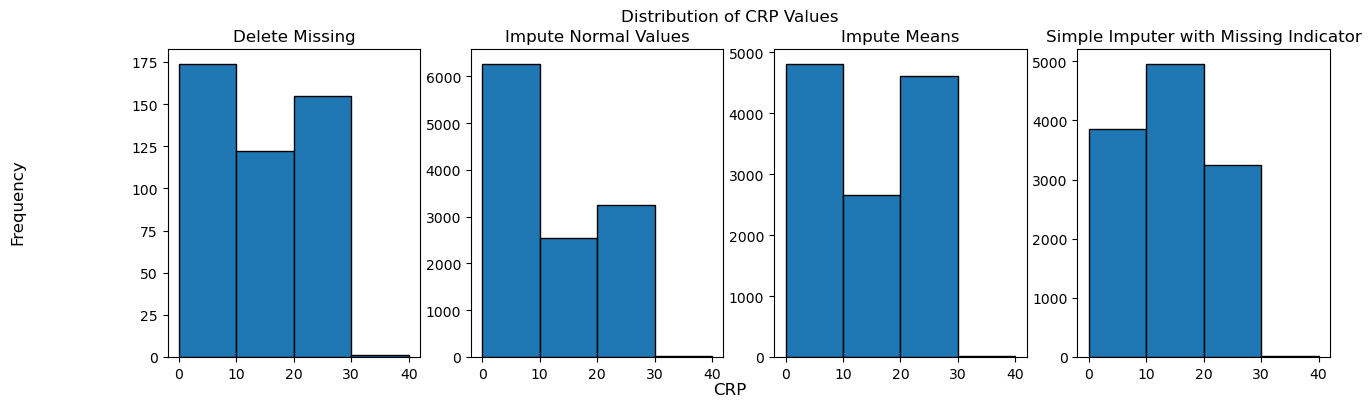

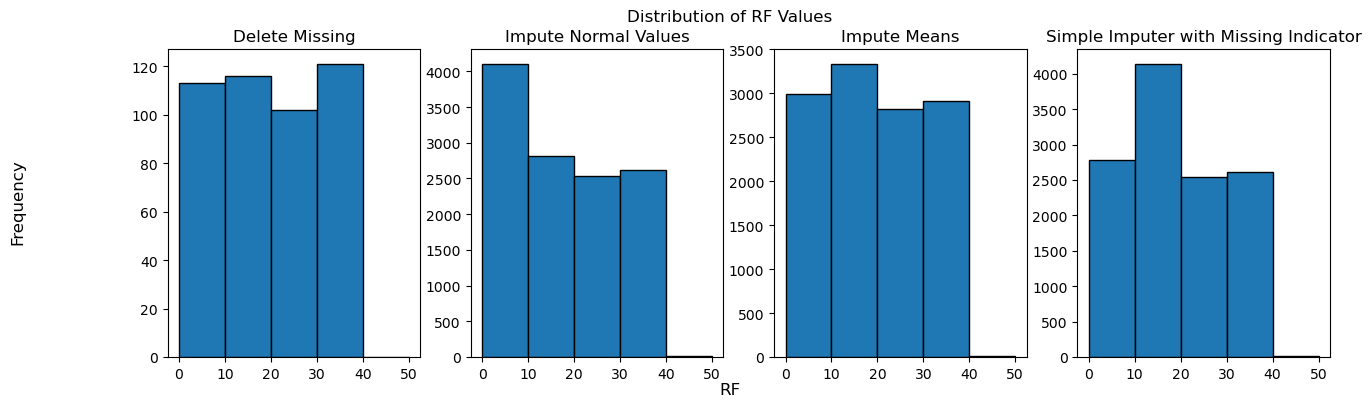

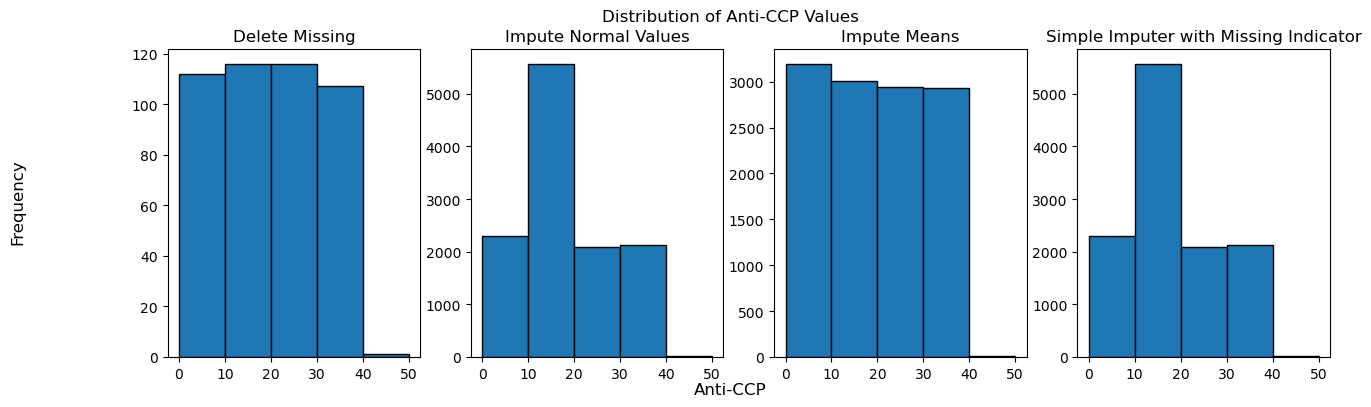

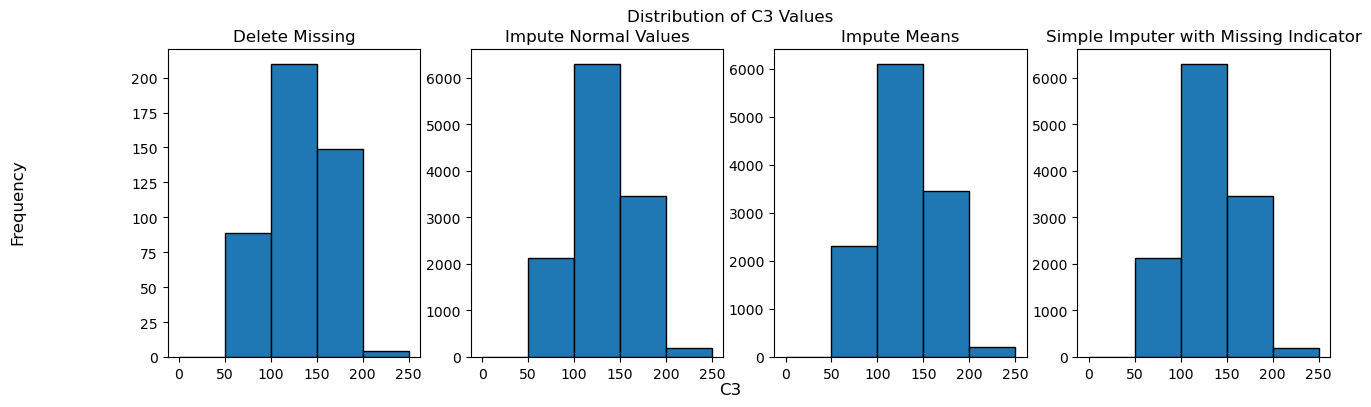

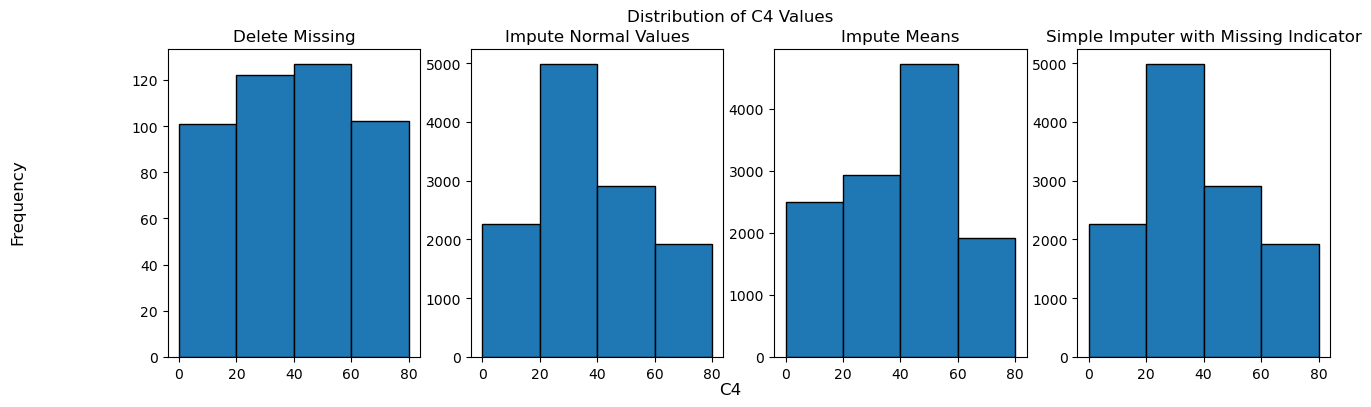

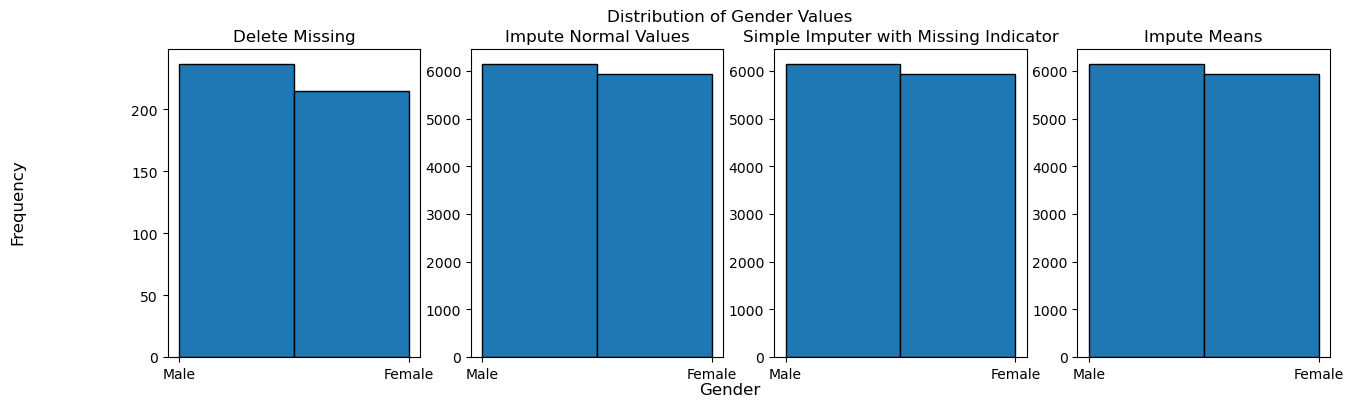

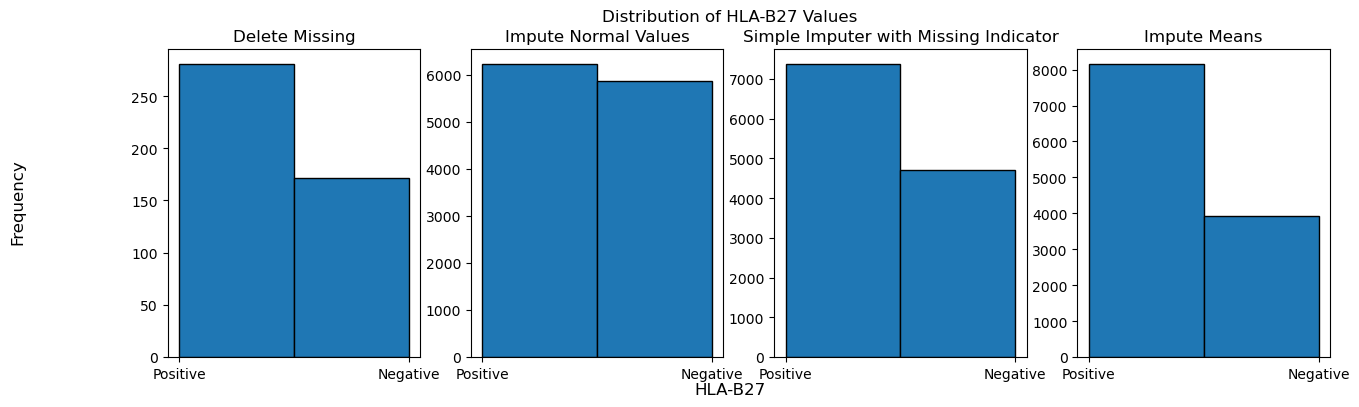

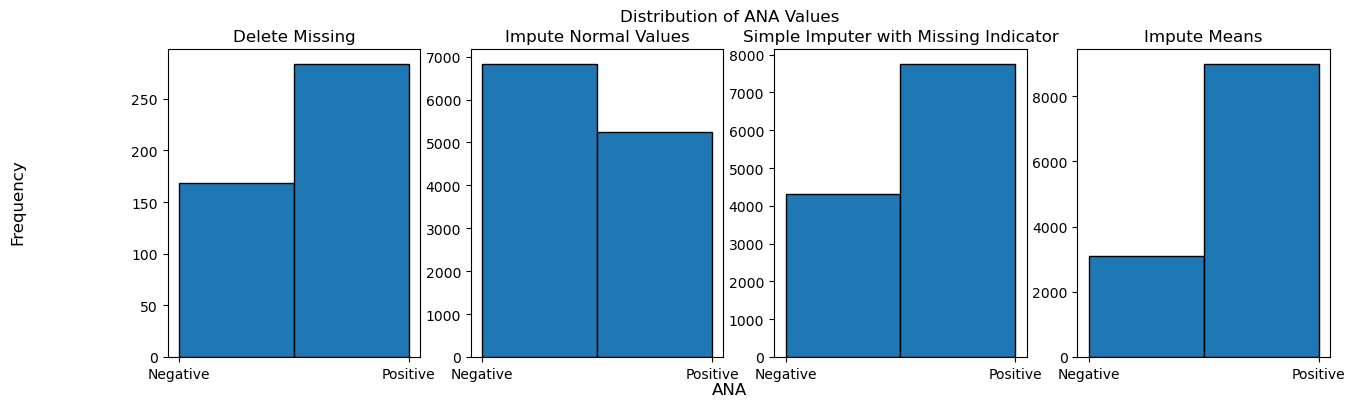

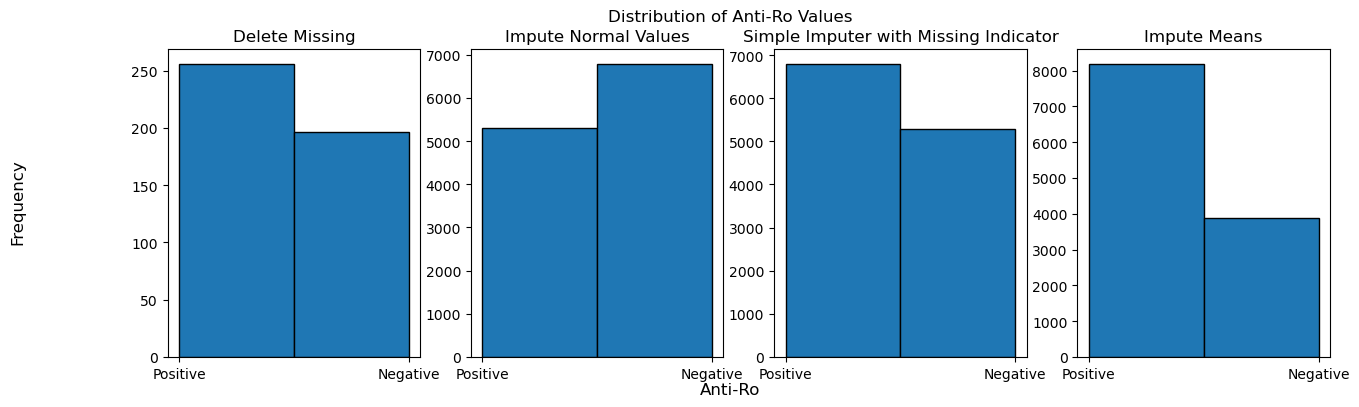

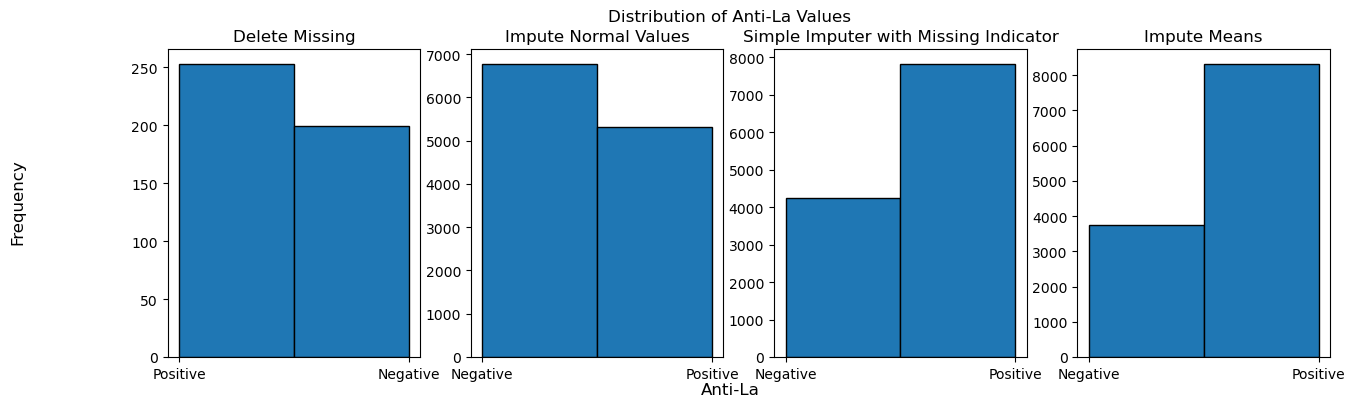

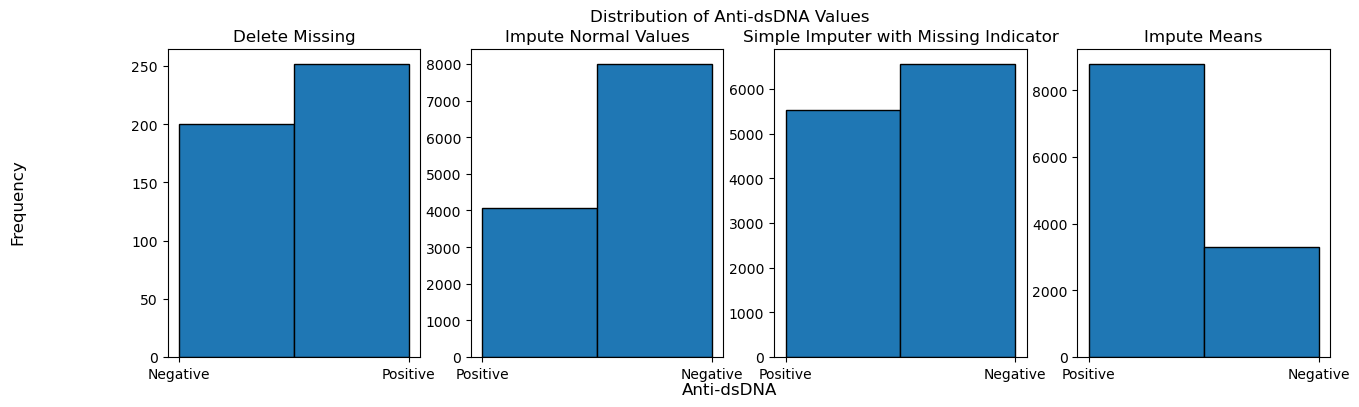

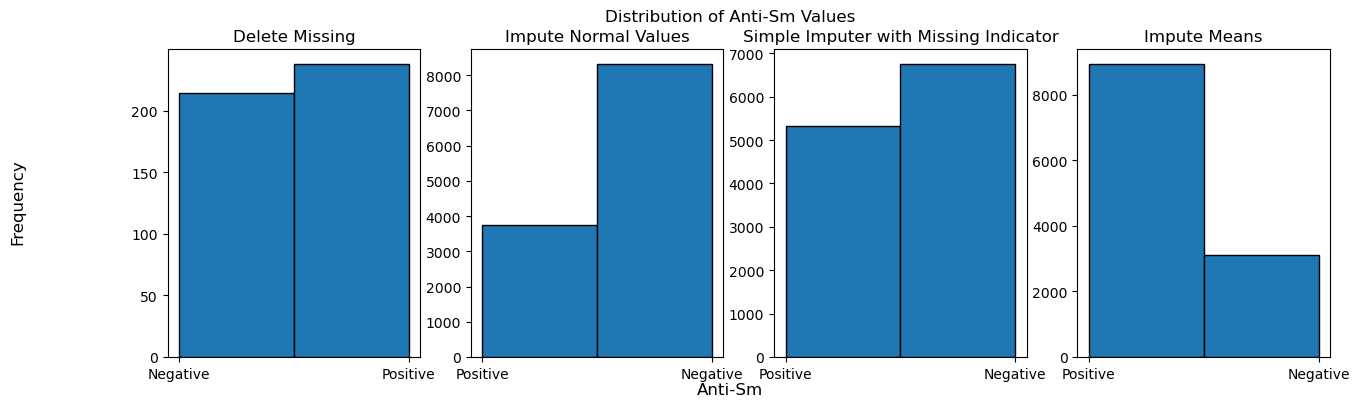

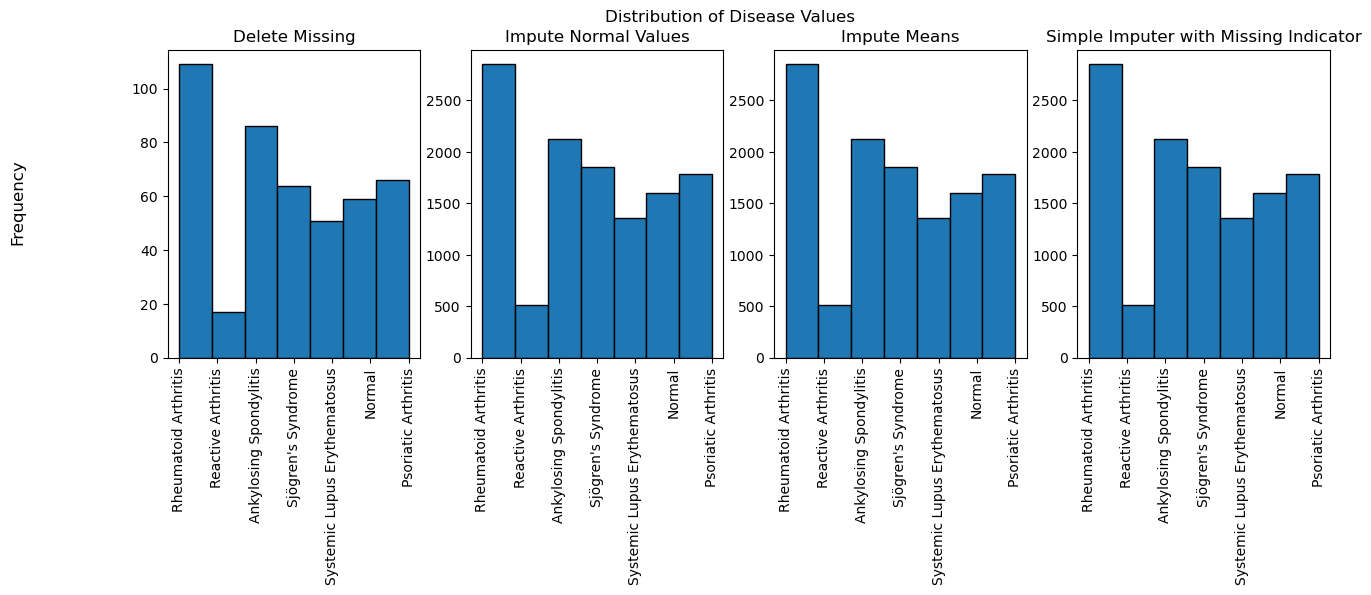

In [8]:
# visualize data - evaluate whether to use option 1 (drop all rows with missing data) or option 2 (impute with midpoint of normal reference range) or option 3 (impute with mean values)

bins = {
    "Age": [0,20,40,60,80,100],
    "Gender": 2,
    "ESR": [0,10,20,30,40,50],
    "CRP": [0,10,20,30,40], 
    "RF": [0,10,20,30,40, 50], 
    "Anti-CCP": [0,10,20,30,40, 50], 
    "C3": [0,50,100,150,200,250], 
    "C4": [0,20,40,60,80],
    "HLA-B27": 2,
    "ANA": 2,
    "Anti-Ro": 2, 
    "Anti-La": 2, 
    "Anti-dsDNA": 2, 
    "Anti-Sm": 2,
    "Disease": 7
}


for col in ["Age" ] + num_cols:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4), sharey=False)
    plt.suptitle(f"Distribution of {col} Values")
    fig.supxlabel(f"{col}")
    fig.supylabel("Frequency")
    ax1.hist(df_delete_missing[col], bins=bins[col], edgecolor="black")
    ax1.set_title("Delete Missing")
    ax2.hist(df_imputed_normals[col], bins=bins[col], edgecolor="black")
    ax2.set_title("Impute Normal Values")
    ax3.hist(df_imputed_means[col], bins=bins[col], edgecolor="black")
    ax3.set_title("Impute Means")
    ax4.hist(df_simple_imputer[col], bins=bins[col], edgecolor="black")
    ax4.set_title("Simple Imputer with Missing Indicator")
    plt.show()


for col in ["Gender"] + cat_cols:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4), sharey=False)
    plt.suptitle(f"Distribution of {col} Values")
    fig.supxlabel(f"{col}")
    fig.supylabel("Frequency")
    ax1.hist(df_delete_missing[col], bins=bins[col], edgecolor="black")
    ax1.set_title("Delete Missing")
    ax2.hist(df_imputed_normals[col], bins=bins[col], edgecolor="black")
    ax2.set_title("Impute Normal Values")
    ax3.hist(df_imputed_means[col], bins=bins[col], edgecolor="black")
    ax4.set_title("Impute Means")
    ax4.hist(df_simple_imputer[col], bins=bins[col], edgecolor="black")
    ax3.set_title("Simple Imputer with Missing Indicator")
    plt.show()


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4), sharey=False)
plt.suptitle("Distribution of Disease Values")
# fig.supxlabel("Disease")
fig.supylabel("Frequency")
ax1.hist(df_delete_missing["Disease"], bins=7, edgecolor="black")
ax1.set_title("Delete Missing")
ax2.hist(df_imputed_normals["Disease"], bins=7, edgecolor="black")
ax2.set_title("Impute Normal Values")
ax3.hist(df_imputed_means["Disease"], bins=7, edgecolor="black")
ax3.set_title("Impute Means")
ax4.hist(df_simple_imputer["Disease"], bins=7, edgecolor="black")
ax4.set_title("Simple Imputer with Missing Indicator")
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
ax3.tick_params('x', labelrotation=90)
ax4.tick_params('x', labelrotation=90)
plt.show()


In [9]:
# set dataset for analysis
df = df_delete_missing.copy()
df = df_imputed_normals.copy()  # option 2, impute missing values with midpoint of normal reference range
df = df_imputed_means.copy()  # option 3, impute missing values with mean (numerical) / most frequent (categorical) value for that disease
df = df_simple_imputer.copy()  # option 4, impute missing values with mean (numerical) / most frequent (categorical) with missing indicator

In [10]:
# save csv files of experimental datasets

df_delete_missing.to_csv('1_df_delete_missing.csv', index=False) # option 1, delete all rows with missing values
df_imputed_normals.to_csv('2_df_impute_normals.csv', index=False) # option 2, impute missing values with midpoint of normal reference range
df_imputed_means.to_csv('3_df_impute_means.csv', index=False) # option 3, impute missing values with mean (numerical) / most frequent (categorical) value for that disease
df_simple_imputer.to_csv('4_df_simple_imputer.csv', index=False) # option 4, impute missing values with mean (numerical) / most frequent (categorical) with missing indicator

print("4 experiemental datasets saved to CSV")

4 experiemental datasets saved to CSV
